# Project - seaborn
---

In this project you will analyze and visualize data on the modern Olympic Games, from the first games in Athens in 1896 to the Summer Olympics of Rio in 2016.

You will work with 2 files:
1. [athlete_events.csv](../Data/athlete_events.csv)
2. [noc_regions.csv](../Data/noc_regions.csv)

The dataset include Summer and Winter Olympics data.

Use pandas to answer the following questions, then replicate the given visualizations using Matplotlib and seaborn:

1. What is the total number of athletes in each game?
2. What is the total number of male vs. female athletes in each game?
3. What is the growth rate of female participation over years
4. Who are the top medal winning athletes?
5. Who are the top medal winning countries?
6. What is the age distribution of males vs. females
7. What are the top summer sporting events?
8. What are the top summer sporting events?

_[Link to Original Data Source](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)_

> This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set theme (optional)

sns.set_theme()

## Step 1: Read and Explore Data

In [6]:
# Read athletes df

df_athletes = pd.read_csv('../Data/athlete_events.csv')

# The first 5 rows of the DataFrame "df_athletes"

df_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# Read noc df

df_noc = pd.read_csv('../Data/noc_regions.csv')

# The first 5 rows of the DataFrame "df_noc"

df_noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
# Explore dfs

# Summary of the DataFrame "df_athletes" (entries, columns, non-null values, and data types)

df_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [10]:
# Summary of the DataFrame "df_noc" (entries, columns, non-null values, and data types)

df_noc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [12]:
# Descriptive statistics for the numerical columns in the DataFrame "df_athletes"

df_athletes.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [17]:
# Descriptive statistics for the categorical columns in the DataFrame "df_noc"

df_noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [29]:
# Find missing values in both dfs

# Calculate and display the number of missing values in each column of the DataFrame "df_athletes"

print("Number of missing values in each column of 'df_athletes' :\n")
print(df_athletes.isna().sum(), "\n")

# Calculate and display the number of missing values in each column of the DataFrame "df_noc"

print("Number of missing values in each column of 'df_noc' :\n")
print(df_noc.isna().sum())

Number of missing values in each column of 'df_athletes' :

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64 

Number of missing values in each column of 'df_noc' :

NOC         0
region      3
notes     209
dtype: int64


## Step 2: Data Preparation

### Handle Missing Values in `athletes` DataFrame

Assume missing values in `Medal` column mean that the athlete won no medals.
Leave this column as is for now.

For the remaining missing values:
1. Fill the missing `Age` values with mean age depending on the values in the `Sex` column. For example, if we're missing the age for a female athlete, fill in their age with the average age of other female athletes. Start with this column.

2. Follow a similar approach for the `Height` and `Weight` columns. Fill in the missing values depending on the average height and weight for athletes of the same gender.

In [54]:
# Replace missing "Age" values with mean age depending on values in "Sex"

# Calculate the mean age for males and females

mean_age_male = df_athletes[df_athletes['Sex']=="M"]['Age'].mean(axis = 0)
mean_age_female = df_athletes[df_athletes['Sex']=="F"]['Age'].mean(axis = 0)

print("The average age of males is : ",mean_age_male)
print("The average age of females is : ",mean_age_female)

The average age of males is :  26.277561532227104
The average age of females is :  23.732880779508218


In [66]:
# Boolean mask to identify missing ages for males

nan_age_male = (df_athletes['Age'].isna()) & (df_athletes['Sex'] == "M")

# Boolean mask to identify missing ages for females

nan_age_female = (df_athletes['Age'].isna()) & (df_athletes['Sex'] == "F")

In [67]:
# Replace missing age values for males with the calculated mean age for males

df_athletes.loc[nan_age_male,"Age"] = mean_age_male

# Replace missing age values for females with the calculated mean age for females

df_athletes.loc[nan_age_female,"Age"] = mean_age_female

In [70]:
# Check the number of missing values in the 'Age' column

print(f"Number of missing values in column 'Age' is : {df_athletes['Age'].isna().sum()}")

Number of missing values in column 'Age' is : 0


In [80]:
# Replace missing "Height" values depending on values in "Sex"

# Calculate the mean height for males and females

mean_height_male = df_athletes[df_athletes['Sex'] == 'M']['Height'].mean(axis = 0)
mean_height_female = df_athletes[df_athletes['Sex'] == 'F']['Height'].mean(axis = 0)

print("The average age of males is : ",mean_height_male)
print("The average age of females is : ",mean_height_female)

The average age of males is :  178.85846329588276
The average age of females is :  167.83973997447237


In [83]:
# Boolean mask to identify missing ages for males

nan_height_male = (df_athletes["Sex"] == 'M') & (df_athletes['Height'].isna())

# Boolean mask to identify missing ages for females

nan_height_female = (df_athletes["Sex"] == 'F') & (df_athletes['Height'].isna())

In [85]:
# Replace missing age values for males with the calculated mean age for males

df_athletes.loc[nan_height_male,"Height"] = mean_height_male

# Replace missing age values for females with the calculated mean age for females

df_athletes.loc[nan_height_female,"Height"] = mean_height_female

In [86]:
# Check the number of missing values in the 'Age' column

print(f"Number of missing values in column 'Height' is : {df_athletes['Height'].isna().sum()}")

Number of missing values in column 'Height' is : 0


In [87]:
# Replace missing "Weight" values depending on values in "Sex"

# Calculate the mean height for males and females

mean_weight_male = df_athletes[df_athletes['Sex'] == 'M']['Weight'].mean(axis = 0)
mean_weight_female = df_athletes[df_athletes['Sex'] == 'F']['Weight'].mean(axis = 0)

# Boolean mask to identify missing ages for males

nan_weight_male = (df_athletes["Sex"] == 'M') & (df_athletes['Weight'].isna())

# Boolean mask to identify missing ages for females

nan_weight_female = (df_athletes["Sex"] == 'F') & (df_athletes['Weight'].isna())

# Replace missing age values for males with the calculated mean age for males

df_athletes.loc[nan_weight_male,"Weight"] = mean_weight_male

# Replace missing age values for females with the calculated mean age for females

df_athletes.loc[nan_weight_female,"Weight"] = mean_weight_female

# Check the number of missing values in the 'Age' column

print(f"Number of missing values in column 'Height' is : {df_athletes['Weight'].isna().sum()}")

Number of missing values in column 'Height' is : 0


In [88]:
# Confirm that dataset has no more missing values (Except "Medal" column)

# Calculate and display the number of missing values in each column of the DataFrame "df_athletes"

print("Number of missing values in each column of 'df_athletes' :\n")
print(df_athletes.isna().sum(), "\n")

Number of missing values in each column of 'df_athletes' :

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64 



### Handle Missing Values in `noc` DataFrame

Fill in the missing values in the `region` column with values from the `notes` column.

In [90]:
# Fill missing values in noc "region" column with values from "notes" column
df_noc[df_noc['region'].isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


In [91]:
# Fill missing values in noc "region" column with values from "notes" column
df_noc['region'].fillna(df_noc['notes'],inplace = True)

In [93]:
# Confirm that "region" column has no more missing values

# Check the number of missing values in the 'region' column

print(f"Number of missing values in column 'region' is : {df_noc['region'].isna().sum()}")

Number of missing values in column 'region' is : 0


### Merge DataFrames

The `head()` of your new merged DataFrame should look like this:

In [97]:
# Run this cell to see the example
pd.read_csv('../Data/sample_merged_df.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5 non-null      int64  
 1   Name    5 non-null      object 
 2   Sex     5 non-null      object 
 3   Age     5 non-null      float64
 4   Height  5 non-null      float64
 5   Weight  5 non-null      float64
 6   Team    5 non-null      object 
 7   NOC     5 non-null      object 
 8   Games   5 non-null      object 
 9   Year    5 non-null      int64  
 10  Season  5 non-null      object 
 11  City    5 non-null      object 
 12  Sport   5 non-null      object 
 13  Event   5 non-null      object 
 14  Medal   1 non-null      object 
 15  region  5 non-null      object 
 16  notes   0 non-null      float64
dtypes: float64(4), int64(2), object(11)
memory usage: 812.0+ bytes


In [100]:
# Merge athletes and noc DataFrames
df = pd.merge(df_athletes,df_noc,on='NOC', how='left')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,178.858463,75.743677,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,178.858463,75.743677,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Data Analysis and Visualization

- Make sure you don't run the cells directly above the displayed graphs. If you do, it will erase them. You can redownload the notebook to retrieve the graphs.

- All the code for plotting a figure should be in the same cell. If you separate your code into multiple cells, you may not get the desired output.

- It's ok if your visualizations aren't identical to the ones displayed in terms of colours or styling, as long as the values represented are the same.

### 1. Total Number of Athletes in each Olympic Game

In [158]:
total_athletes_per_game = df.groupby("Games").size()
total_athletes = total_athletes_per_game.to_frame()
total_athletes.reset_index(inplace = True)
total_athletes.columns = ["Games","Athletes"]
total_athletes.head()

,Games,Athletes
0,1896 Summer,380
1,1900 Summer,1936
2,1904 Summer,1301
3,1906 Summer,1733
4,1908 Summer,3101


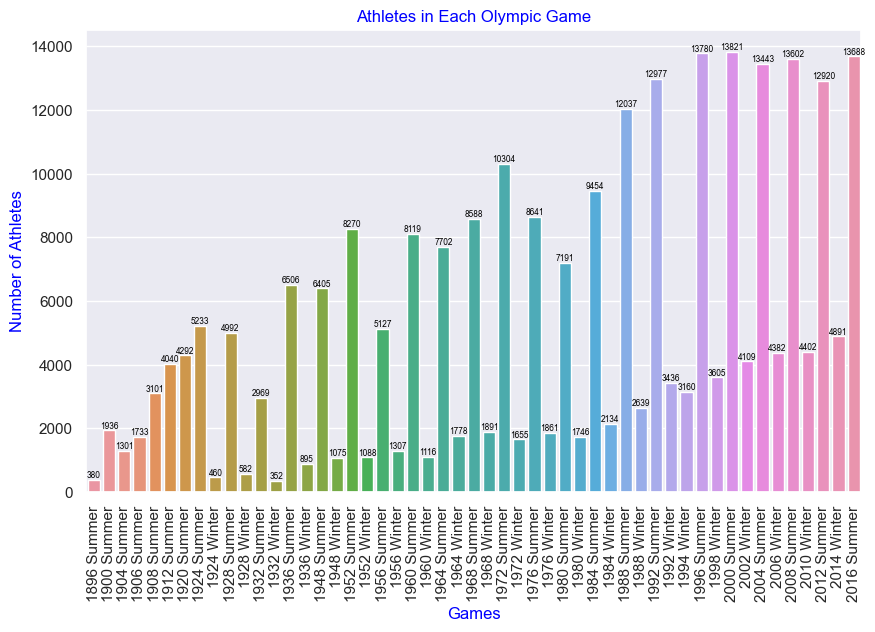

In [169]:
# Visualization

# Create the barplot

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Games', y='Athletes', data=total_athletes)

# Add annotations for each bar

for index, row in total_athletes.iterrows():
    
    # Add the text with the value above each bar
    ax.text(index, row['Athletes'], round(row['Athletes'], 2), color='black', ha="center", va="bottom", fontsize=6)

# Set the labels and title

plt.xlabel("Games", color='blue')
plt.ylabel("Number of Athletes", color='blue')
plt.title('Athletes in Each Olympic Game', color='blue')
plt.xticks(rotation=90)

# Show the plot

plt.show()

<img src='../Data/images/plot1.png'>

### 2. Total Number of Male vs. Female Athletes in each Olympic Game

In [219]:
# Total # of male vs. female athletes

# Group the data by "Games" and "Sex" and count the number of occurrences in each group

df_total = df.groupby(["Games","Sex"]).size()

# Convert the Series resulting from the groupby operation into a DataFrame

df1 = df_total.to_frame()

# Reset the index of the DataFrame to convert the multi-index into columns

df1.reset_index(inplace = True)

# Rename the columns to "Games", "Sex", and "Athletes" for better clarity

df1.columns = ["Games","Sex","Athletes"]

df1.head()

,Games,Sex,Athletes
0,1896 Summer,M,380
1,1900 Summer,F,33
2,1900 Summer,M,1903
3,1904 Summer,F,16
4,1904 Summer,M,1285


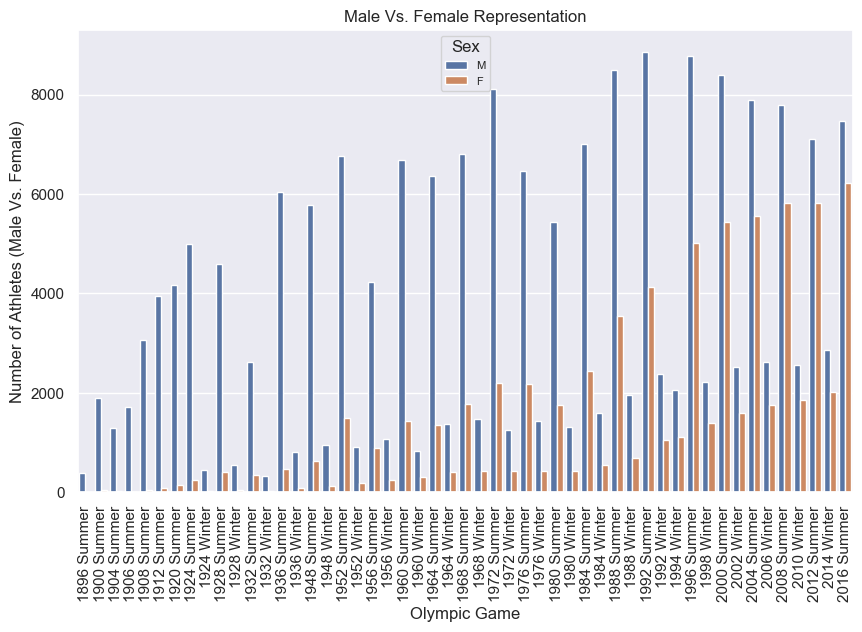

In [220]:
# Visualization

# Create a figure and axes with a specific size

plt.subplots(figsize = (10, 6))

# Create a barplot)

sns.barplot(data = df1, x = "Games", y = 'Athletes', hue = "Sex")

# Add a label to the x-axis

plt.xlabel('Olympic Game')

# Rotate the x-axis tick labels 90 degrees for better readability

plt.xticks(rotation = 90)

# Add a label to the y-axis

plt.ylabel('Number of Athletes (Male Vs. Female)')

# Add a title to the plot

plt.title('Male Vs. Female Representation')

# Add a legend

plt.legend(title = 'Sex',fontsize = 8, loc = "upper center")

# Show the plot

plt.show()

<img src='../Data/images/plot2.png'>

### 3. Growth of Female Participation over Years

In [397]:
# Calculate yearly growth (percentage)


# Filter the data to include only female participants

female_participation = df[df['Sex'] == 'F']

# Group by year and count the total number of participants for each year

total_participants_by_year = df.groupby('Year').size().reset_index(name = 'Total Participants')

# Group by year and count the number of female participants for each year

female_participants_by_year = female_participation.groupby('Year').size().reset_index(name = 'Female Participants')

# Merge the two DataFrames on the 'Year' column

merged_df = pd.merge(total_participants_by_year, female_participants_by_year, on = 'Year')

# Calculate the percentage of female participants relative to the total per year

merged_df['Percentage Female Participation'] = (merged_df['Female Participants'] / merged_df['Total Participants']) * 100

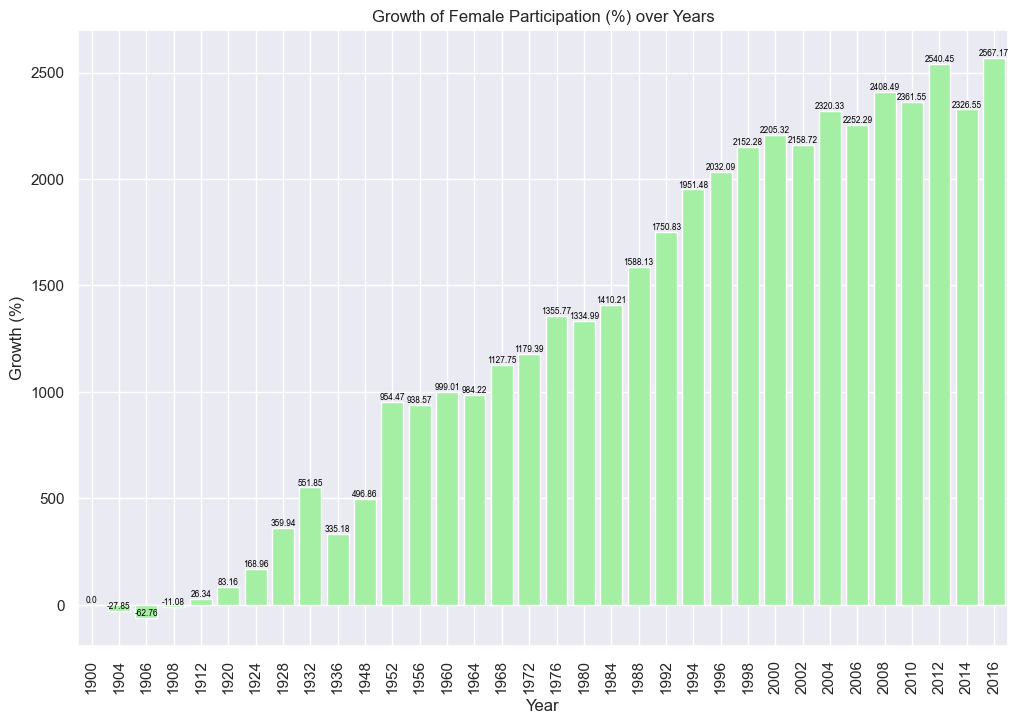

In [464]:
# Calculate percentage growth relative to the first available year

first_year = merged_df['Year'].min()
initial_percentage = merged_df.loc[merged_df['Year'] == first_year, 'Percentage Female Participation'].values[0]
merged_df['Growth'] = (merged_df['Percentage Female Participation'] - initial_percentage) / initial_percentage * 100

# Plotting

plt.figure(figsize = (12, 8))
ax = sns.barplot(data = merged_df, x = 'Year', y = 'Growth', color = 'palegreen')

# Add annotations for each bar

for index, row in merged_df.iterrows():
    ax.text(index, row['Growth'], round(row['Growth'], 2), color = 'black', ha = "center", va = "bottom", fontsize = 6)

# Customize labels and title

plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Growth (%)')
plt.title('Growth of Female Participation (%) over Years')

# Show plot

plt.grid(True)
plt.show()

<img src='../Data/images/plot3.png'>

### 4. Top 20 Medal Winning Athletes

In [333]:
# Top 20 athletes with most medals

# Drop rows where 'Medal' column is NaN

df2 = df.dropna(subset = ['Medal'])

# Group by 'ID' and 'Name', count the number of occurrences, and reset index with a column named 'Count'

df_medal = df2.groupby(['ID','Name']).size().reset_index(name='Count')

# Sort the DataFrame by 'Count' column in descending order

df_medal.sort_values("Count",ascending = False,inplace = True)

# Select the top 20 athletes with the most medals

top_20 = df_medal.head(20)
top_20

,ID,Name,Count
19409,94406,"Michael Fred Phelps, II",28
13805,67046,Larysa Semenivna Latynina (Diriy-),18
664,4198,Nikolay Yefimovich Andrianov,15
2194,11951,Ole Einar Bjrndalen,13
22446,109161,Borys Anfiyanovych Shakhlin,13
18380,89187,Takashi Ono,13
15390,74420,Edoardo Mangiarotti,13
17578,85286,Aleksey Yuryevich Nemov,12
6951,35550,Birgit Fischer-Schmidt,12
24808,119922,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12


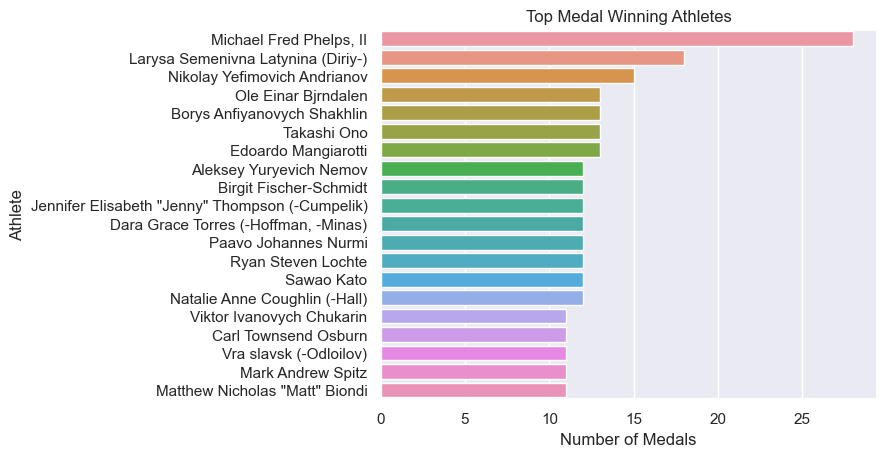

In [334]:
# Visualization

# Create a bar plot data from the "top_20" DataFrame

sns.barplot(data = top_20,x = "Count" , y = "Name")

# Add a title to the plot

plt.title('Top Medal Winning Athletes')

# Label the x-axis

plt.xlabel("Number of Medals")

# Label the y-axis

plt.ylabel("Athlete")

# Display the plot

plt.show()

<img src='../Data/images/plot4.png'>

### 5. Top 10 Medal Winning Countries

In [335]:
# Group by 'Team', count the number of occurrences, and reset index with a column named 'Count'

df3 = df2.groupby(['Team']).size().reset_index(name='Count')

# Sort the DataFrame by 'Count' column in descending order

df3.sort_values("Count", ascending=False, inplace=True)

# Select the top 10 teams with the highest count of occurrences

top_10 = df3.head(10)

In [336]:
# Assign the team name "USA" 

top_10.loc[462, "Team"] = "USA"

# Assign the team name "Russia"

top_10.loc[403, "Team"] = "Russia"

# Assign the team name "UK"

top_10.loc[171, "Team"] = "UK"

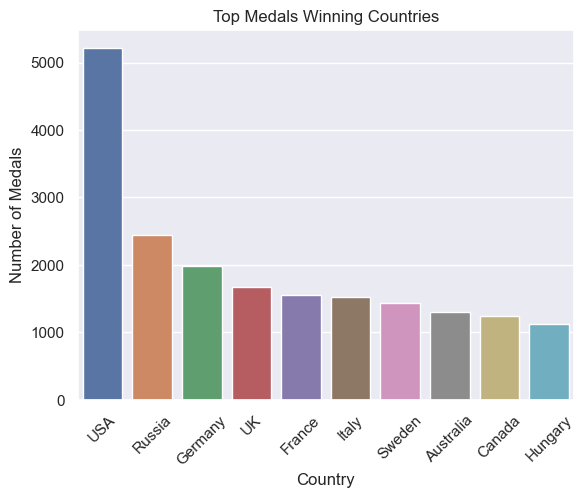

In [337]:
# Visualization

# Create a bar plot uwith data from the "top_10" DataFrame

sns.barplot(data=top_10, x="Team", y="Count")

# Label the x-axis

plt.xlabel("Country")

# Rotate the x-axis labels 

plt.xticks(rotation=45)

# Label the y-axis

plt.ylabel("Number of Medals")

# Add a title to the plot

plt.title("Top Medals Winning Countries")

# Display the plot

plt.show()

<img src='../Data/images/plot5.png'>

### 6. Age Distribution of Male vs. Female Over Years

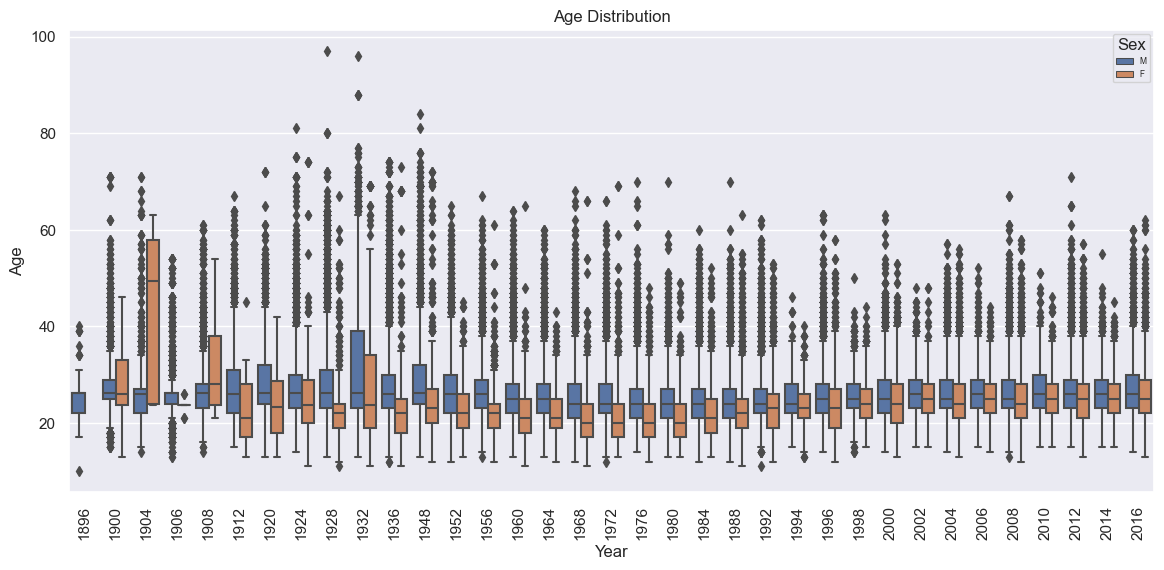

In [379]:
# Visualization
plt.subplots(figsize=(14,6))
sns.boxplot(data = df, x = 'Year', y = 'Age', hue = 'Sex')
plt.xlabel('Year')
plt.xticks(rotation = 90)
plt.ylabel('Age')
plt.title('Age Distribution')
plt.legend(title = "Sex",fontsize = 6)
plt.show()

<img src='../Data/images/plot6.png'>

### 7. Top 4 Summer Sporting Events

In [453]:
# Top summer sporting events by "Sex"

# Filter the DataFrame for rows where the Season is "Summer"

summer_games = df[df['Season'] == "Summer"]

# Group the filtered DataFrame by 'Sport' and 'Sex', then count the number of occurrences in each group

event_counts = summer_games.groupby(['Sport', 'Sex']).size().reset_index(name = 'Count')

# Filter the event_counts DataFrame to get the top 4 events for males

event_counts_male = event_counts[event_counts['Sex'] == "M"].sort_values('Count', ascending = False).head(4)

# Filter the event_counts DataFrame to get the top 4 events for females

event_counts_female = event_counts[event_counts['Sex'] == "F"].sort_values('Count', ascending = False).head(4)

# Concatenate the top male and female event 

top_events = pd.concat([event_counts_male, event_counts_female])

# Display the DataFrame containing the top events for both males and females

top_events

,Sport,Sex,Count
8,Athletics,M,26958
39,Gymnastics,M,17578
68,Swimming,M,13345
65,Shooting,M,9724
7,Athletics,F,11666
67,Swimming,F,9850
38,Gymnastics,F,9129
57,Rowing,F,2193


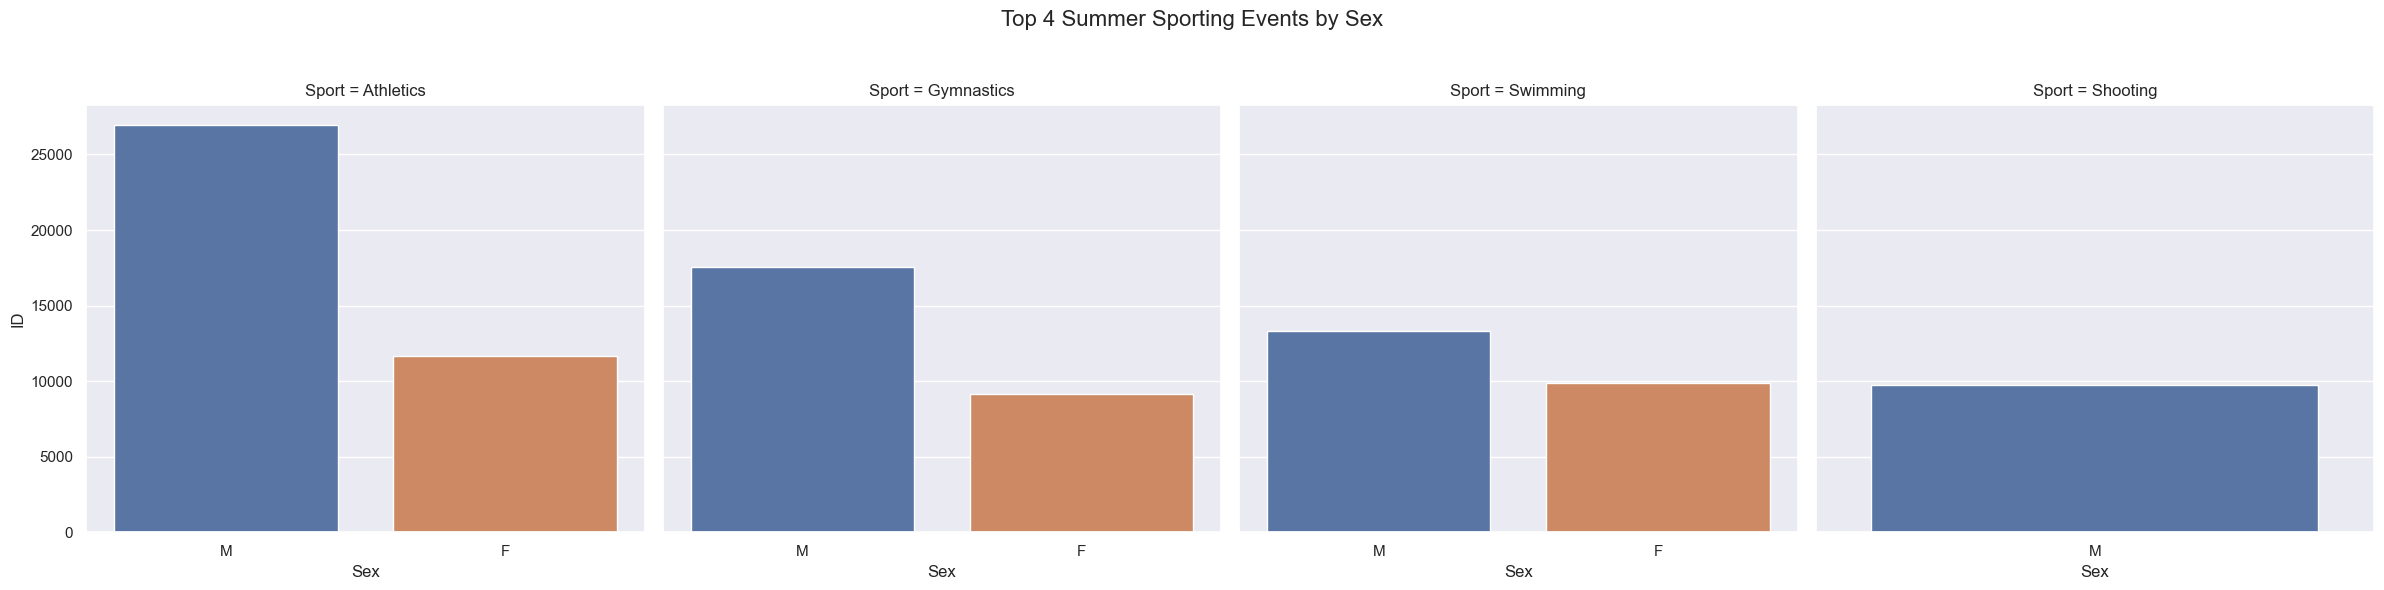

In [455]:
# Visualization

# Get unique sports from the top_events DataFrame

unique_sports = top_events['Sport'].unique()

# Set up the figure and axes for the grid

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

# Ensure the grid has exactly 4 columns

if len(unique_sports) < 4:
    for i in range(len(unique_sports), 4):
        fig.delaxes(axes[i])

# Loop through each sport and create a bar plot in the grid

for i, sport in enumerate(unique_sports[:4]):
    
    # Filter the DataFrame for the current sport
    
    sport_data = top_events[top_events['Sport'] == sport]
    
    # Create the bar plot on the corresponding axis
    
    sns.barplot(ax=axes[i], data=sport_data, x='Sex', y='Count', hue='Sex', dodge=False)
    
    # Customize labels and title
    
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel('ID' if i == 0 else '')
    axes[i].set_title(f'Sport = {sport}')
    axes[i].legend([],[], frameon=False)  

# Add a main title for the entire figure

fig.suptitle('Top 4 Summer Sporting Events by Sex', fontsize = 16)

# Display the plot

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

<img src='../Data/images/plot7.png'>

### 8. Top 4 Winter Sporting Events

In [456]:
# Top winter sporting events by "Sex"

# Filter the DataFrame for rows where the Season is "Summer"

winter_games = df[df['Season'] == "Winter"]

# Group the filtered DataFrame by 'Sport' and 'Sex', then count the number of occurrences in each group

event_counts = winter_games.groupby(['Sport', 'Sex']).size().reset_index(name = 'Count')

# Filter the event_counts DataFrame to get the top 4 events for males

event_counts_male = event_counts[event_counts['Sex'] == "M"].sort_values('Count', ascending = False).head(4)

# Filter the event_counts DataFrame to get the top 4 events for females

event_counts_female = event_counts[event_counts['Sex'] == "F"].sort_values('Count', ascending = False).head(4)

# Concatenate the top male and female event 

top_events = pd.concat([event_counts_male, event_counts_female])

# Display the DataFrame containing the top events for both males and females

top_events

,Sport,Sex,Count
8,Cross Country Skiing,M,5748
1,Alpine Skiing,M,5431
16,Ice Hockey,M,4702
30,Speed Skating,M,3532
0,Alpine Skiing,F,3398
7,Cross Country Skiing,F,3385
29,Speed Skating,F,2081
3,Biathlon,F,1863


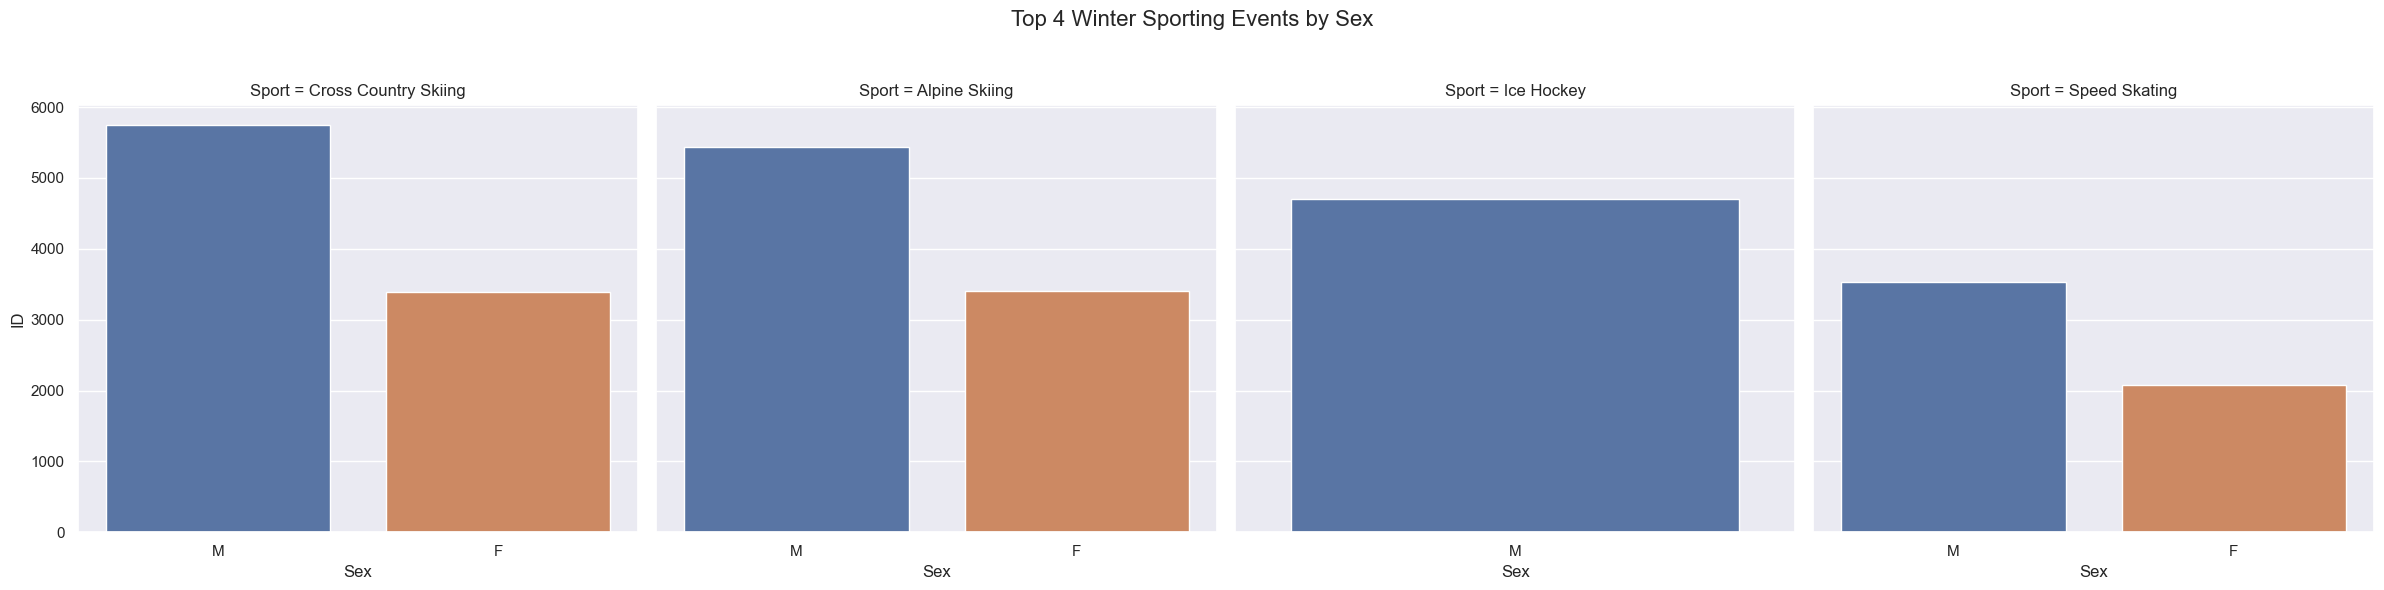

In [457]:
# Visualization

# Get unique sports from the top_events DataFrame

unique_sports = top_events['Sport'].unique()

# Set up the figure and axes for the grid

fig, axes = plt.subplots(1, 4, figsize=(24, 6), sharey=True)

# Ensure the grid has exactly 4 columns

if len(unique_sports) < 4:
    for i in range(len(unique_sports), 4):
        fig.delaxes(axes[i])

# Loop through each sport and create a bar plot in the grid

for i, sport in enumerate(unique_sports[:4]):
    
    # Filter the DataFrame for the current sport
    
    sport_data = top_events[top_events['Sport'] == sport]
    
    # Create the bar plot on the corresponding axis
    
    sns.barplot(ax=axes[i], data=sport_data, x='Sex', y='Count', hue='Sex', dodge=False)
    
    # Customize labels and title
    
    axes[i].set_xlabel('Sex')
    axes[i].set_ylabel('ID' if i == 0 else '')
    axes[i].set_title(f'Sport = {sport}')
    axes[i].legend([],[], frameon=False)  

# Add a main title for the entire figure

fig.suptitle('Top 4 Winter Sporting Events by Sex', fontsize = 16)

# Display the plot

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()


<img src='../Data/images/plot8.png'>

## The End!